In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
print 'num_classes = ', num_classes
samples_per_class = 7
for y, cls in enumerate(classes):
    print y, cls

num_classes =  10
0 plane
1 car
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


In [4]:
idxs = np.flatnonzero(y_train==1)
idxs

array([    4,     5,    32, ..., 49993, 49998, 49999])

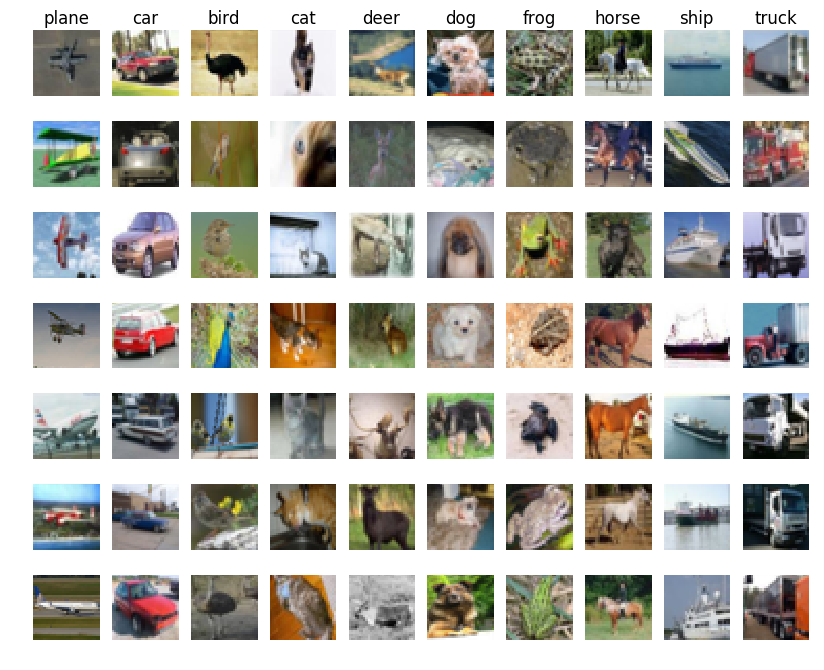

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
num_training = 5000
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]
X_train.shape

(5000, 32, 32, 3)

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0],-1))
X_test = np.reshape(X_test,(X_test.shape[0],-1))
print X_train.shape, X_test.shape

(5000, 3072) (500, 3072)


In [8]:
from cs231n.classifiers import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train,y_train)

In [9]:
dists = classifier.compute_distances_two_loops(X_test)
print dists.shape

(500, 5000)


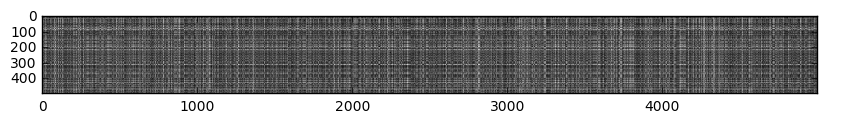

In [10]:
plt.imshow(dists,interpolation='none')
plt.show()

In [11]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)
#print "y_test_pred = ",y_test_pred
# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)

Got 137 / 500 correct => accuracy: 0.274000


In [12]:
y_test.shape

(500,)

In [13]:
y_test_pred = classifier.predict_labels(dists, 5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)


Got 139 / 500 correct => accuracy: 0.278000


In [14]:
X_test.shape

(500, 3072)

In [15]:
X_test[0].shape

(3072,)

In [16]:
y_test_pred = classifier.predict_labels(dists, k=3)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print 'Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy)



Got 136 / 500 correct => accuracy: 0.272000


In [17]:
dists_one = classifier.compute_distances_one_loop(X_test)
difference = np.linalg.norm(dists - dists_one, ord='fro')
print 'Difference was: %f' % (difference, )
if difference < 0.001:
  print 'Good! The distance matrices are the same'
else:
  print 'Uh-oh! The distance matrices are different'


Difference was: 0.000000
Good! The distance matrices are the same


In [18]:
# Let's compare how fast the implementations are
def time_function(f, *args):
  """
  Call a function f with args and return the time (in seconds) that it took to execute.
  """
  import time
  tic = time.time()
  f(*args)
  toc = time.time()
  return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print 'Two loop version took %f seconds' % two_loop_time

Two loop version took 29.537483 seconds


In [19]:
one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print 'One loop version took %f seconds' % one_loop_time

One loop version took 52.139324 seconds


In [20]:
no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print 'No loop version took %f seconds' % no_loop_time

# you should see significantly faster performance with the fully vectorized implementation

No loop version took 0.295357 seconds


In [30]:
num_folds = 5
k_choices = [1,3,5,8,10,12,15,20,50,100]
X_train_folds=[]
y_train_folds=[]

print 'X_train shape= ',X_train.shape
i = 0
for k in k_choices:
    print k,i
    X_train_folds.append(np.array_split(X_train,k))
    y_train_folds.append(np.array_split(y_train,k))
    print 'X_train_fold[k] = ', len(X_train_folds[i])
    X_train_folds
    i = i+1


 X_train shape=  (5000, 3072)
1 0
X_train_fold[k] =  1
3 1
X_train_fold[k] =  3
5 2
X_train_fold[k] =  5
8 3
X_train_fold[k] =  8
10 4
X_train_fold[k] =  10
12 5
X_train_fold[k] =  12
15 6
X_train_fold[k] =  15
20 7
X_train_fold[k] =  20
50 8
X_train_fold[k] =  50
100 9
X_train_fold[k] =  100
